In [1]:
import seaborn as sns
import scipy
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import StratifiedKFold,RepeatedStratifiedKFold, StratifiedGroupKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score,accuracy_score
from sklearn.metrics import recall_score,balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix,average_precision_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.patches import ConnectionPatch
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.metrics import  roc_curve, RocCurveDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import precision_recall_curve
from sklearn.svm import SVC
from scipy.stats import mannwhitneyu
import numpy.ma as ma
import statannot
from statannot import add_stat_annotation
from scipy.stats import chisquare
from scipy.stats import chi2_contingency

In [2]:
metadata=pd.read_csv('data/metadata.csv',index_col=0)


In [3]:
for i in metadata.index:
    if metadata.loc[i,'Gender'].startswith("f"):
        metadata.at[i,'Gender']='f'
    elif metadata.loc[i,'Gender'].startswith("m"):
        metadata.at[i,'Gender']='m'

In [4]:
for i in metadata.index:
    if metadata.loc[i,'Gender'].startswith("F"):
        metadata.at[i,'Gender']='f'
    elif metadata.loc[i,'Gender'].startswith("M"):
        metadata.at[i,'Gender']='m'

In [5]:
for i in metadata.index:
    if metadata.loc[i,'BMI']=='#¡DIV/0!':
        metadata.at[i,'BMI']=np.nan

In [6]:
metadata['Age']=metadata['Age'].astype(int)
metadata['BMI']=metadata['BMI'].astype(float)

In [7]:
metadata= pd.get_dummies(metadata, columns = ['Gender'],drop_first=True)
metadata['Gender_m']=metadata['Gender_m'].astype(int)

In [8]:
metadata_cancer=metadata.loc[metadata['Diagnosis']=='Cancer']
metadata_normal=metadata.loc[metadata['Diagnosis']=='Normal']


In [9]:
meta=pd.concat([metadata_normal,metadata_cancer]).sample(frac=1,random_state=5)

In [10]:
meta_file=meta[['Diagnosis','Study','Country','Age','BMI','Gender_m']]
meta_file

,Diagnosis,Study,Country,Age,BMI,Gender_m
SampleID,,,,,,
SRR2143719,Cancer,Baxter,USA,75,30.0,0
ERR475521,Cancer,Zeller,FRA,48,24.0,0
SRR2143930,Normal,Baxter,USA,72,23.0,0
Healthy1-2027,Normal,Zackular,CA,65,22.0,0
SRR2143912,Normal,Baxter,USA,51,25.0,1
...,...,...,...,...,...,...
SRR2143836,Cancer,Baxter,USA,71,32.0,1
SRR2143587,Normal,Baxter,USA,51,21.0,0
SRR2143926,Normal,Baxter,USA,45,21.0,0


In [11]:
meta_file.to_csv('data/meta_file.csv')

In [12]:
U1, p = mannwhitneyu(metadata_normal['Age'].values, metadata_cancer['Age'].values)

print(p)

5.613837270449593e-06


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Cancer v.s. Normal: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.614e-06 U_stat=3.001e+04


(<Axes: xlabel='Diagnosis', ylabel='Age'>,
 [<statannot.StatResult.StatResult at 0x176170afa50>])

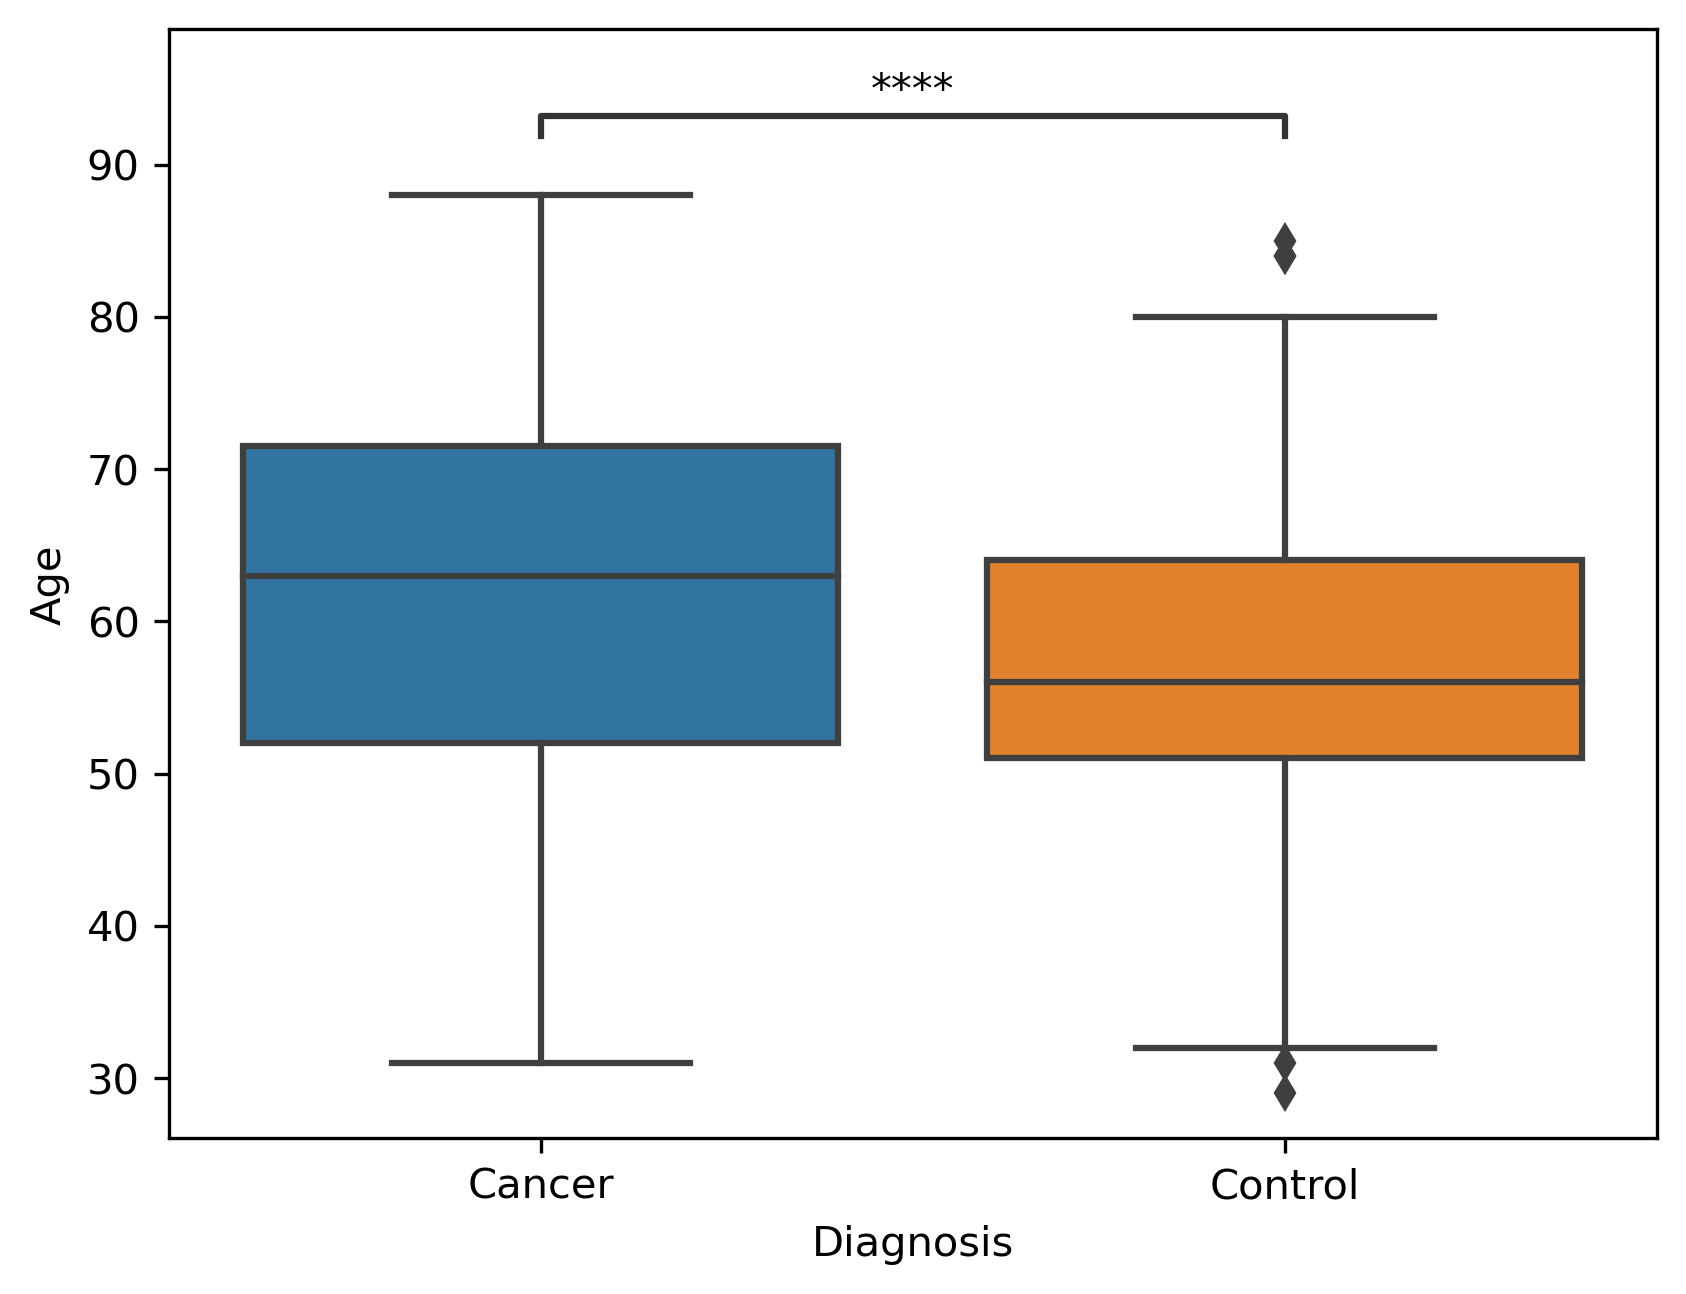

In [13]:
plt.figure(dpi=300)
ax1 =sns.boxplot(meta_file, y='Age', x='Diagnosis')
ax1.set(xticklabels=["Cancer", "Control"])
add_stat_annotation(ax1, data=meta_file, x='Diagnosis', y='Age', #order=order,
                   box_pairs=[("Cancer", "Normal")],
                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2)

In [14]:
U1, p = mannwhitneyu(metadata_normal['BMI'].dropna().values, metadata_cancer['BMI'].dropna().values)

print(p)

0.002675411283394016


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Cancer v.s. Normal: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.675e-03 U_stat=2.757e+04


(<Axes: xlabel='Diagnosis', ylabel='BMI'>,
 [<statannot.StatResult.StatResult at 0x1761716c6d0>])

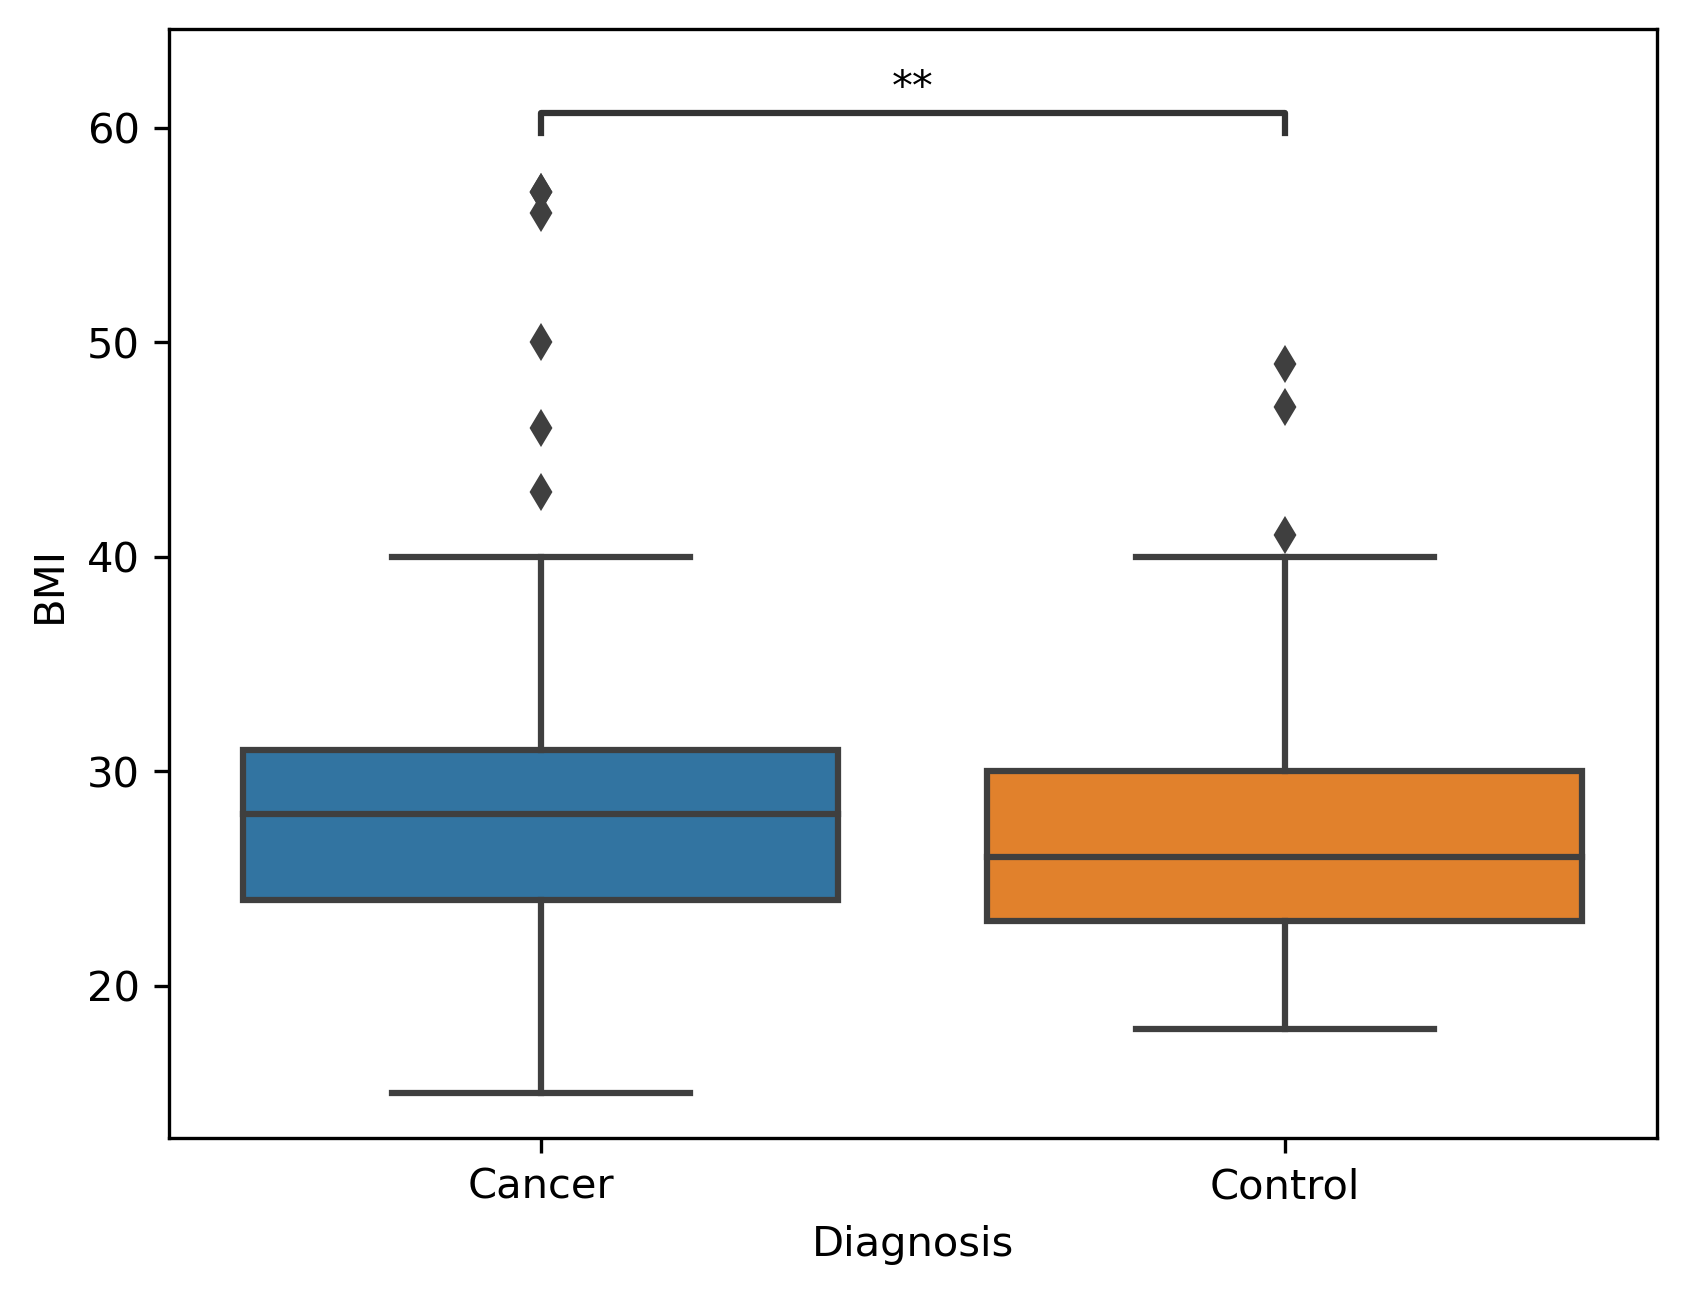

In [15]:
plt.figure(dpi=300)
ax1 =sns.boxplot(meta_file, y='BMI', x='Diagnosis')
ax1.set(xticklabels=["Cancer", "Control"])
add_stat_annotation(ax1, data=meta_file, x='Diagnosis', y='BMI', #order=order,
                   box_pairs=[("Cancer", "Normal")],
                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2)

In [16]:
np.unique(metadata_normal['Study'],return_counts=True)

(array(['Baxter', 'Zackular', 'Zeller'], dtype=object),
 array([171,  30,  50], dtype=int64))

In [17]:
np.unique(metadata_cancer['Study'],return_counts=True)

(array(['Baxter', 'Zackular', 'Zeller'], dtype=object),
 array([120,  30,  41], dtype=int64))

In [18]:
np.unique(metadata_cancer['Gender_m'],return_counts=True)

(array([0, 1]), array([ 77, 114], dtype=int64))

In [19]:
np.unique(metadata_normal['Gender_m'],return_counts=True)

(array([0, 1]), array([150, 101], dtype=int64))

In [20]:
#gender
table = np.array([[101, 150], [114, 77]])

res= chi2_contingency(table)
res.pvalue

7.619779341125903e-05

In [21]:
np.unique(metadata_cancer['Country'],return_counts=True)

(array(['CA', 'FRA', 'USA'], dtype=object),
 array([  2,  41, 148], dtype=int64))

In [22]:
np.unique(metadata_normal['Country'],return_counts=True)

(array(['CA', 'FRA', 'USA'], dtype=object),
 array([  3,  50, 198], dtype=int64))

In [23]:
#country
table = np.array([[3, 50,198], [2,41, 148]])

res= chi2_contingency(table)
res.pvalue

0.9166988747714854